<a href="https://colab.research.google.com/github/zakia16/Machine-Learning-Projects/blob/main/Survival%20prediction%20using%20titanic%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Load the dataset
data = pd.read_csv("train_modified.csv")

# Display the first few rows of the dataset to understand its structure
data.head()


Saving train_modified.csv to train_modified (2).csv


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
1,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,1
2,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,1
3,37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1
4,56,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S,1


#Step 1 : Basic Statistics


In [ ]:
basic_statistics= data.describe()
basic_statistics

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


#Step 2: Checking for Missing Values

In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()
missing_values

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

In [ ]:
# Impute missing values

# Age: Using median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Cabin: Convert to binary/ could be dropped
data['Cabin'] = data['Cabin'].notnull().astype('int')

# Embarked: Using mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Check again for missing values
missing_values_after = data.isnull().sum()
missing_values_after

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

#step 3. Exploratory Data Analysis (EDA)

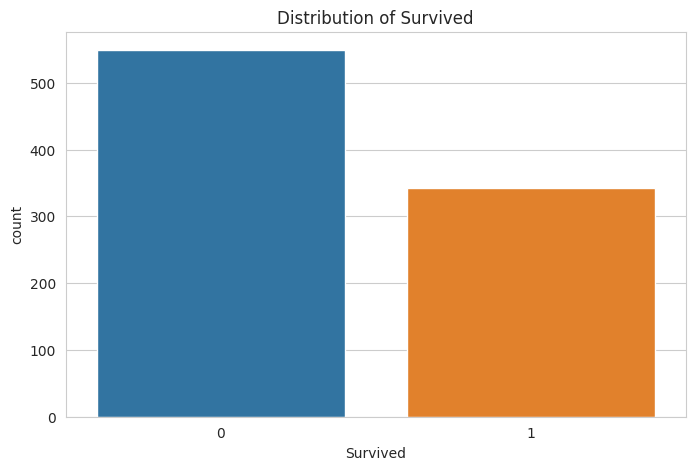

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style
sns.set_style("whitegrid")

# Plot the distribution of the target variable 'Survived'
plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=data)
plt.title('Distribution of Survived')
plt.show()

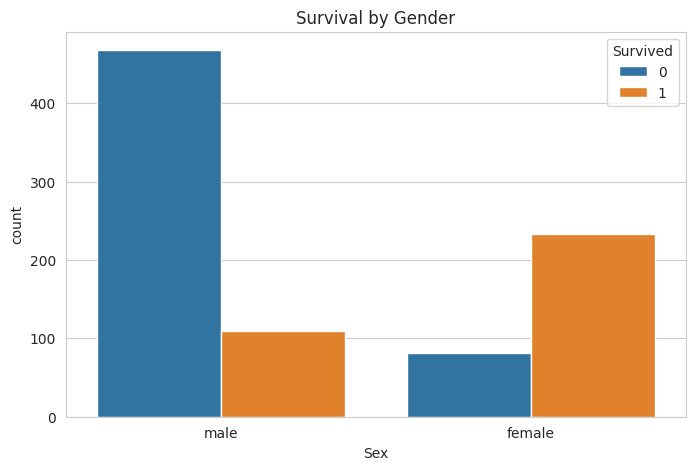

In [ ]:
# Plotting the relationship between Sex and Survived
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.show()

Findings:
A higher proportion of females survived compared to males.
A large number of males did not survive.

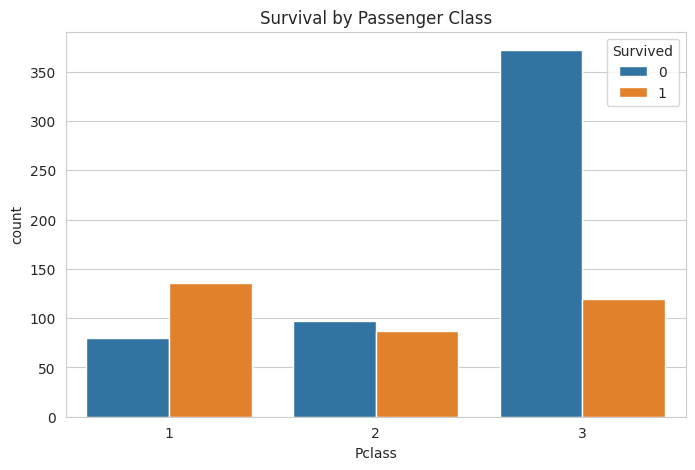

In [ ]:
# Plotting the relationship between Pclass and Survived
plt.figure(figsize=(8, 5))
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Passenger Class')
plt.show()

#Step 4. Feature Engineering

In [ ]:
# Drop columns that are not directly useful for prediction
data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Encode the 'Sex' column (0 for female, 1 for male)
data['Sex'] = data['Sex'].map({'female': 0, 'male': 1})

# Use one-hot encoding for the 'Embarked' column
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

data.head()


,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Survived,Embarked_Q,Embarked_S
0,2,1,28.0,0,0,13.0000,0,1,0,1
1,2,1,34.0,0,0,13.0000,1,1,0,1
2,1,1,28.0,0,0,35.5000,1,1,0,1
3,3,1,28.0,0,0,7.2292,0,1,0,0
4,1,1,28.0,0,0,35.5000,1,1,0,1


#Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Splitting the data into training and testing sets
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the RandomForest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

accuracy, classification_rep, confusion_mat

(0.8097014925373134,
 '              precision    recall  f1-score   support\n\n           0       0.84      0.86      0.85       168\n           1       0.75      0.73      0.74       100\n\n    accuracy                           0.81       268\n   macro avg       0.80      0.79      0.80       268\nweighted avg       0.81      0.81      0.81       268\n',
 array([[144,  24],
        [ 27,  73]]))

Accuracy:
80.6%

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the scaled data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initializing and training the RandomForest classifier on the scaled data
clf_scaled = RandomForestClassifier(random_state=42)
clf_scaled.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred_scaled = clf_scaled.predict(X_test_scaled)

# Evaluate the model's performance on the scaled data
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
classification_rep_scaled = classification_report(y_test, y_pred_scaled)
confusion_mat_scaled = confusion_matrix(y_test, y_pred_scaled)

accuracy_scaled, classification_rep_scaled, confusion_mat_scaled


(0.8134328358208955,
 '              precision    recall  f1-score   support\n\n           0       0.85      0.86      0.85       168\n           1       0.76      0.74      0.75       100\n\n    accuracy                           0.81       268\n   macro avg       0.80      0.80      0.80       268\nweighted avg       0.81      0.81      0.81       268\n',
 array([[144,  24],
        [ 26,  74]]))

After scaling the features and training the RandomForest classifier again, we achieved an accuracy of approximately
81%
The results are quite similar to the previous unscaled data, showing that RandomForest is relatively insensitive to feature scaling.

Hyperparameter Tuning for RandomForest didn't work